In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import logistic
from sklearn import metrics

In [2]:
data = pd.read_csv("census_earning.csv")

In [73]:
data.head()

,age,workclass,fnlwht,education,eductionnum,maritalstatus,occupation,relation,race,sex,capital_gain,captal_loss,hoursperweek,native,earning
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# THERE SEEMS TO  BE A DSFVB LIFJVGLGDFH

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwht           32561 non-null int64
education        32561 non-null object
eductionnum      32561 non-null int64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relation         32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capital_gain     32561 non-null int64
captal_loss      32561 non-null int64
hoursperweek     32561 non-null int64
native           32561 non-null object
earning          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [75]:
data.describe()

,age,fnlwht,eductionnum,capital_gain,captal_loss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [76]:
data.describe(include="O")

,workclass,education,maritalstatus,occupation,relation,race,sex,native,earning
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [77]:
# data[data.workclass == ' ?']
clean_data = data[~(data.values == ' ?').any(1)]

In [78]:
clean_data

,age,workclass,fnlwht,education,eductionnum,maritalstatus,occupation,relation,race,sex,capital_gain,captal_loss,hoursperweek,native,earning
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


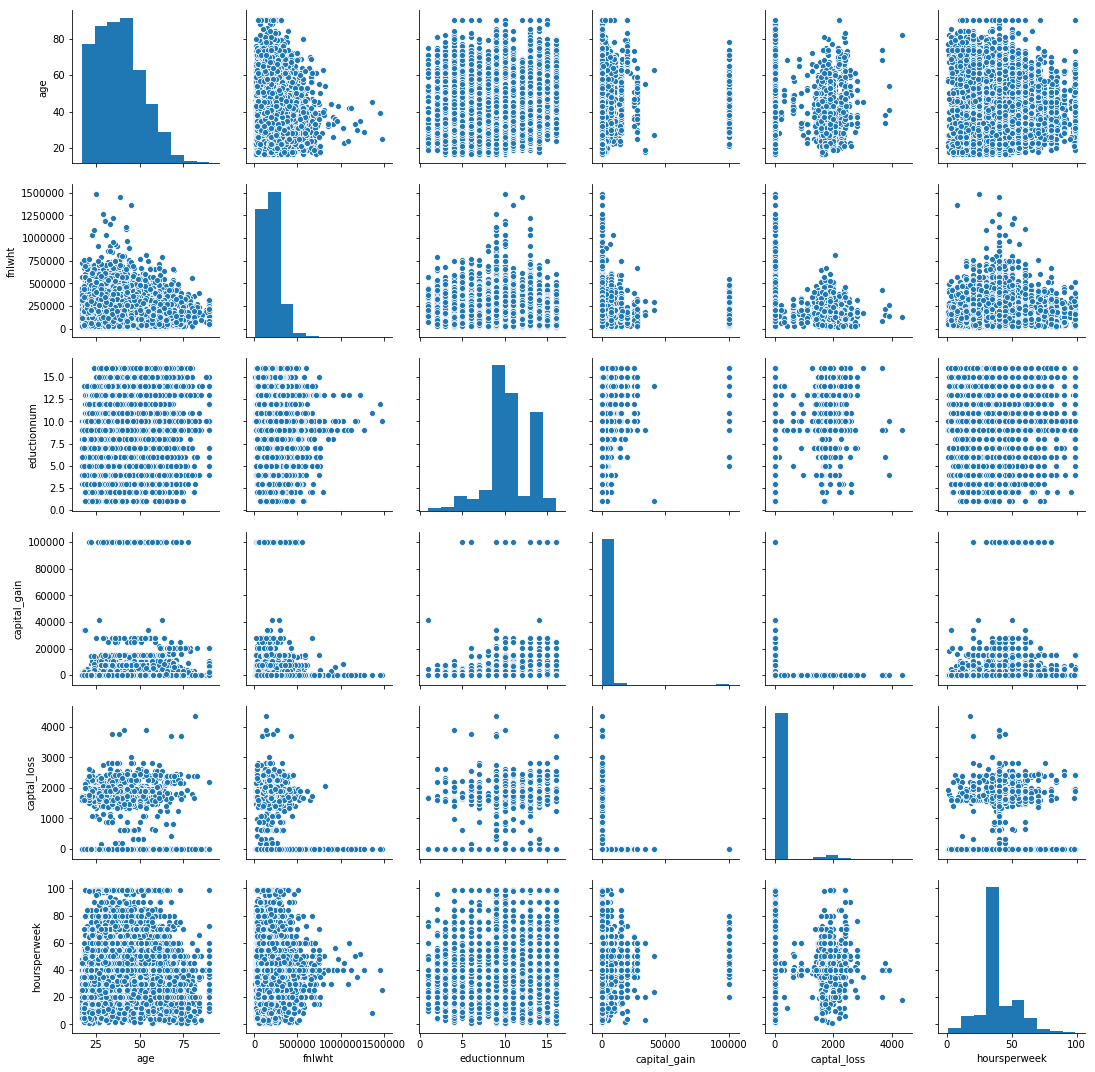

In [79]:
sns.pairplot(clean_data)

In [80]:
workclass_factor = (clean_data.workclass.factorize())[0]
work_class_index = (clean_data.workclass.factorize())[1]

education_factor = (clean_data.education.factorize())[0]
education_index = (clean_data.education.factorize())[1]

maritalstatus_factor = (clean_data.education.factorize())[0]
maritalstatus_index = (clean_data.education.factorize())[1]

occupation_factor = (clean_data.occupation.factorize())[0]
occupation_index = (clean_data.occupation.factorize())[1]

relation_factor = (clean_data.relation.factorize())[0]
relation_index = (clean_data.relation.factorize())[1]

sex_factor = (clean_data.sex.factorize())[0]
sex_index = (clean_data.sex.factorize())[1]

race_factor = (clean_data.race.factorize())[0]
race_index = (clean_data.race.factorize())[1]

native_factor = (clean_data.native.factorize())[0]
native_index = (clean_data.native.factorize())[1]

earning_factor = (clean_data.earning.factorize())[0]
earning_index = (clean_data.earning.factorize())[1]


In [81]:
earning_index

Index([' <=50K', ' >50K'], dtype='object')

In [82]:
clean_data["workclass"] = workclass_factor
clean_data["education"] = education_factor
clean_data["maritalstatus"] = maritalstatus_factor
clean_data["occupation"] = occupation_factor
clean_data["relation"] = relation_factor
clean_data["sex"] = sex_factor
clean_data["race"] = race_factor
clean_data["native"] = native_factor
clean_data["earning"] = earning_factor

C:\Users\INYANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\INYANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\INYANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [57]:
clean_data

,age,workclass,fnlwht,education,eductionnum,maritalstatus,occupation,relation,race,sex,capital_gain,captal_loss,hoursperweek,native,earning
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,0,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,1,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,2,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,0,3,2,1,1,0,0,40,1,1
5,37,2,284582,3,14,3,1,2,0,1,0,0,40,0,0
6,49,2,160187,4,5,4,4,0,1,1,0,0,16,2,2
7,52,1,209642,1,9,1,1,1,0,0,0,0,45,0,0
8,31,2,45781,3,14,3,3,0,0,1,14084,0,50,0,0
9,42,2,159449,0,13,0,1,1,0,0,5178,0,40,0,0


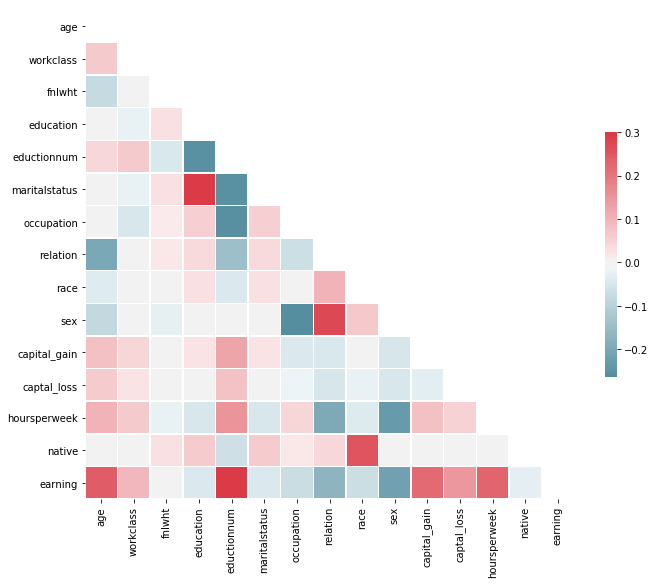

In [83]:
corr = clean_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [100]:
feature = np.array((clean_data.drop(columns=["earning"])))
labels = np.array((clean_data["earning"]))

In [161]:
x_train, x_test, y_train, y_test = train_test_split(feature, labels, test_size = 0.2, random_state = 500)

In [162]:
model = logistic.LogisticRegression()

In [163]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
predictions = model.predict(x_test)

In [165]:
metrics.accuracy_score(predictions, y_test)

0.7971158627548484

In [192]:
index = 3
prediction = model.predict([x_test[index]])
earning_index[prediction]

Index([' <=50K'], dtype='object')

In [193]:
# x_test[index]

In [194]:
earning_index[(y_test[index])]

' <=50K'